# K Nearest Neighbours Classifier

1. Imports
2. Data Preparation
3. KNN Model - Training, Evaluation
4. Hyperparamenter Tuning
5. Advance KNN Variantions
6. Model Evaluation
7. Conclusion

# 1. Imports

In [12]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import  KNeighborsClassifier

from sklearn.metrics import(
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)


# 2. Dataset Preparation

In [13]:
# Load the Breast Cancer dataset
data = load_breast_cancer()

# Create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display the first five rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# 2.2 Dataset Overview

In [14]:
# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("Feature Names:", df.columns.to_list())
print("Target Classes:", data.target_names)

Dataset Shape: (569, 31)
Feature Names: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']
Target Classes: ['malignant' 'benign']


# Check Class Distribution

In [15]:
df['target'].value_counts(normalize=True)

target
1    0.627417
0    0.372583
Name: proportion, dtype: float64

The dataset is relatively balanced (67/37), making it suitable for binary classification without imbalance concerns.

# 2.3 Data Preprocessing

**Proper preprocessing is crucial for KNN as it relies on distance metrics.**

In [16]:
# Separete features and target
X = df.drop('target', axis=1)
y = df['target']

In [17]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (455, 30)
Testing set size: (114, 30)


**KNN is sensitive to the scale of the data. We'll standardize the features using StandarScaler**

In [18]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform testing data
X_test_scaled = scaler.transform(X_test)

# 3. KNN Model - Training, Evaluation

## Basic KNN with default Parameters

In [19]:
# Initialize KNN with default parameters (n_neighbors=5)
knn = KNeighborsClassifier()

# Fit the model
knn.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = knn.predict(X_test_scaled)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuary:{accuracy:.2f}")

Accuary:0.96


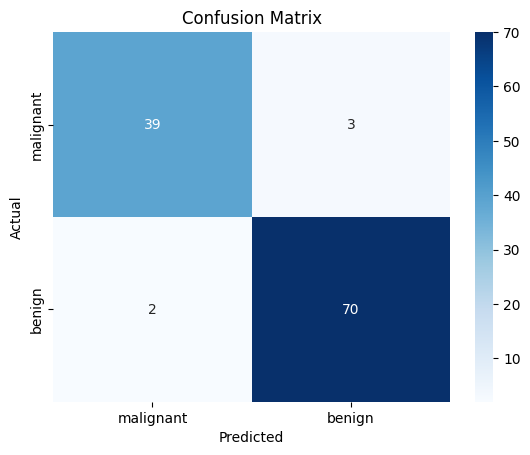

In [21]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
# Classification Report
print(classification_report(y_test,y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Hyperparamter Tuning

### GridSearch for Optional K

In [23]:
# Define the parameter grid
param_grid ={'n_neighbors': np.arange(1,31)}

# Initialize GriSearchCV
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search
grid.fit(X_train_scaled, y_train)

# Best Parameter
print(f"Best Number of neighbors: {grid.best_params_['n_neighbors']}")

Best Number of neighbors: 8


## Retrain the Model

In [25]:
# Get the best K
best_k = grid.best_params_['n_neighbors']

# Initialize KNN with best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Fit Model
knn_best.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_best = knn_best.predict(X_test_scaled)

# Evaluate
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Test Accuracy with K={best_k}: {accuracy_best:.2f}")

Test Accuracy with K=8: 0.97


## Cross-Validation Scores

In [26]:
# Cross-validation scores
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_skf = cross_val_score(knn_best, X_train_scaled, y_train, cv=skf, scoring='accuracy')
#OR
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_kf = cross_val_score(knn_best, X_train_scaled, y_train, cv=kf, scoring='accuracy')
print(f"Mean CV Accuracy (Stratified KFold): {cv_scores_kf.mean():.2f}")

print(f"Mean CV Accuracy: {cv_scores_skf.mean():.2f}")


Mean CV Accuracy (Stratified KFold): 0.97
Mean CV Accuracy: 0.97


## Advanced KNN Variations

### Weighted KNN

Weighted KNN assigns different weights to neighbors base on their distance. Closer neighbors have higher weights

In [27]:
# Initialize Weighted KNN
knn_weighted = KNeighborsClassifier(n_neighbors=best_k, weights='distance')

# Fit the model
knn_weighted.fit(X_train_scaled, y_train)

# Predict
y_pred_weighted = knn_weighted.predict(X_test_scaled)

# Evaluate
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print(f"Weighted KNN Accuracy: {accuracy_weighted:.2f}")

Weighted KNN Accuracy: 0.97


## Using Different Distance Metrics

KNN can use various distance metrics. Let's compare Euclidean and Manhattan distances

In [29]:
# Initialize KNN with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')

# Fit the model
knn_manhattan.fit(X_train_scaled, y_train)

# Predict
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)

# Evaluate
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
print(f"Manhattan KNN Accuracy: {accuracy_manhattan:.2f}")

Manhattan KNN Accuracy: 0.96


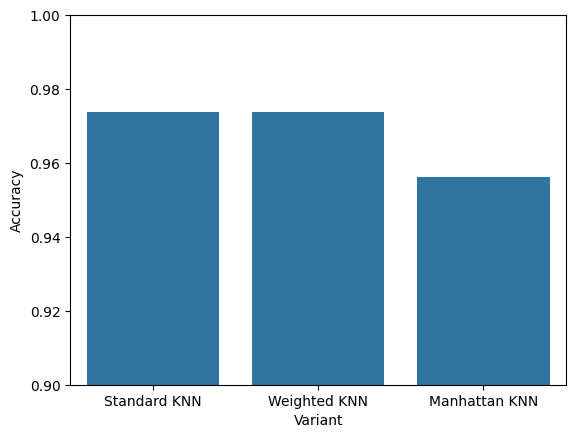

In [30]:
# Summary of accuracies
variants = {
    'Standard KNN': accuracy_best,
    'Weighted KNN': accuracy_weighted,
    'Manhattan KNN': accuracy_manhattan
}

# Create a DataFrame for visualization
variant_df = pd.DataFrame(list(variants.items()), columns=['Variant','Accuracy'])

# Plot
sns.barplot(x='Variant', y='Accuracy', data=variant_df)
plt.ylim(0.90, 1.00)
plt.show()

## Conclusion

In this guide, we explored the K-Nearest Neighbors (KNN) classifier using the Breast Cancer Wisconsin Dataset. The key steps we coverd include:

- Data Loading and Exploration: Undestanding the dataset and its class distribution

- Data Preprocessing: Scaling the features, which is crucial for KNN due to its reliance on distance metrics.

- Model Implementation: Building and evaluating a basic KNN model with default parameters.

- Hyperparameter Tuning: Using Grid Search to find the optimal number of neihbors (K).

- Advanced Variations: Implementin Weighted KNN and experimenting with different distance metrics (Euclidean vs Manhattan) to
observe their impact on performance.

## Key Takeaways

- Feature Scaling: Always scale your features when using KNN, as the algorithm relies on distance calculations which are affected by feature magnitude.

- Choosing K: A smaller value for K can lead to overfitting while a large K may cause underfitting Cross-Validation is an effective way to find the optimal value of K that balances bias and variance.

- Weighted KNN and Distance Metrics: Assigning weights based on distance can improve the model, especially if some neighbors are closer and therefore more relevant. Trying different distance metrics, such as Manhattan distance, can also provide better results depending on the data characteristics.

KNN is a straighforward yet powerful algorithm, making it and excellent choice for introducing machine learning concepts. It also provides a good foundation for undertanding more complex algorithms and concepts in machine learning.